<div style="padding: 10px;color:white;margin:10;font-size:200%;text-align:center;display:fill;border-radius:10px;overflow:hidden)"><b><span style='color:Yellow;font-size:60px; font-family:Times New Roman;'> GOLD PREDICTION </span></b> </div>

Data overview

- Date - date (MM/dd/yyyy format)
- SPX - stands for The Standard and Poor's 500 index, or simply the S&P 500. It is a stock market index used for tracking the stock performance of 500 of the largest companies listed on stock exchanges in USA
- GLD - gold price
- USO - stands for "The United States Oil Fund ® LP (USO)". It is an exchange-traded security whose shares may be purchased and sold on the NYSE Arca
- SLV - silver price
- EUR/USD - Euro to US dollar exchange ratio

 <h1 style="border:3px solid darkred; padding: 15px;color:white;margin:10;font-size:200%;text-align:center;display:fill;border-radius:10px;overflow:hidden; color:darkred;font-weight:bold; font-size:45px;">Importing Libraries</h1>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

import pickle

 <h1 style="border:3px solid darkred; padding: 15px;color:white;margin:10;font-size:200%;text-align:center;display:fill;border-radius:10px;overflow:hidden; color:darkred;font-weight:bold; font-size:45px;">Getting Data</h1>

In [2]:
# importing the dataset
df = pd.read_csv('../../data/gld_price_data.csv')

 <h1 style="border:3px solid darkred; padding: 15px;color:white;margin:10;font-size:200%;text-align:center;display:fill;border-radius:10px;overflow:hidden; color:darkred;font-weight:bold; font-size:45px;">Data Understanding</h1>

In [3]:
# printing the first 5 data rows
df.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [4]:
# checking the shape of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


```
- Our data has 2290 rows and 6 columns
```

In [5]:
df.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

`There are no null values in our dataset`

In [6]:
# Deleting the Date column 
df = df.drop(columns =['Date'],axis=1)
df.head()

,SPX,GLD,USO,SLV,EUR/USD
0,1447.160034,84.860001,78.470001,15.180,1.471692
1,1447.160034,85.570000,78.370003,15.285,1.474491
2,1411.630005,85.129997,77.309998,15.167,1.475492
3,1416.180054,84.769997,75.500000,15.053,1.468299
4,1390.189941,86.779999,76.059998,15.590,1.557099


`There are outliers in the rows SLV, USO, GLD`

In [7]:
df.nunique()

SPX        2277
GLD        1930
USO        1514
SLV        1331
EUR/USD    2066
dtype: int64

In [8]:
df.head()

,SPX,GLD,USO,SLV,EUR/USD
0,1447.160034,84.860001,78.470001,15.180,1.471692
1,1447.160034,85.570000,78.370003,15.285,1.474491
2,1411.630005,85.129997,77.309998,15.167,1.475492
3,1416.180054,84.769997,75.500000,15.053,1.468299
4,1390.189941,86.779999,76.059998,15.590,1.557099


 <h1 style="border:3px solid darkred; padding: 15px;color:white;margin:10;font-size:200%;text-align:center;display:fill;border-radius:10px;overflow:hidden; color:darkred;font-weight:bold; font-size:45px;">Exploratory Data Analysis</h1>

In [9]:
df.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


#### Distribution of variables

array([[<Axes: title={'center': 'SPX'}>, <Axes: title={'center': 'GLD'}>,
        <Axes: title={'center': 'USO'}>, <Axes: title={'center': 'SLV'}>,
        <Axes: title={'center': 'EUR/USD'}>]], dtype=object)

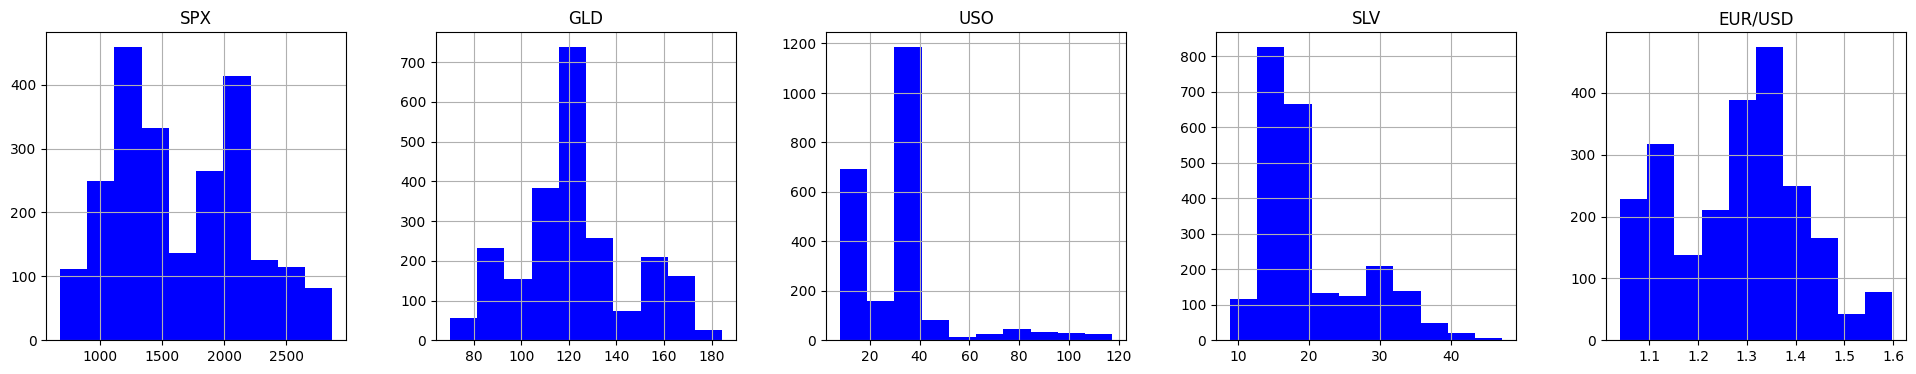

In [10]:
df.hist(figsize=(24,4) , layout=(1,5) , color='b')

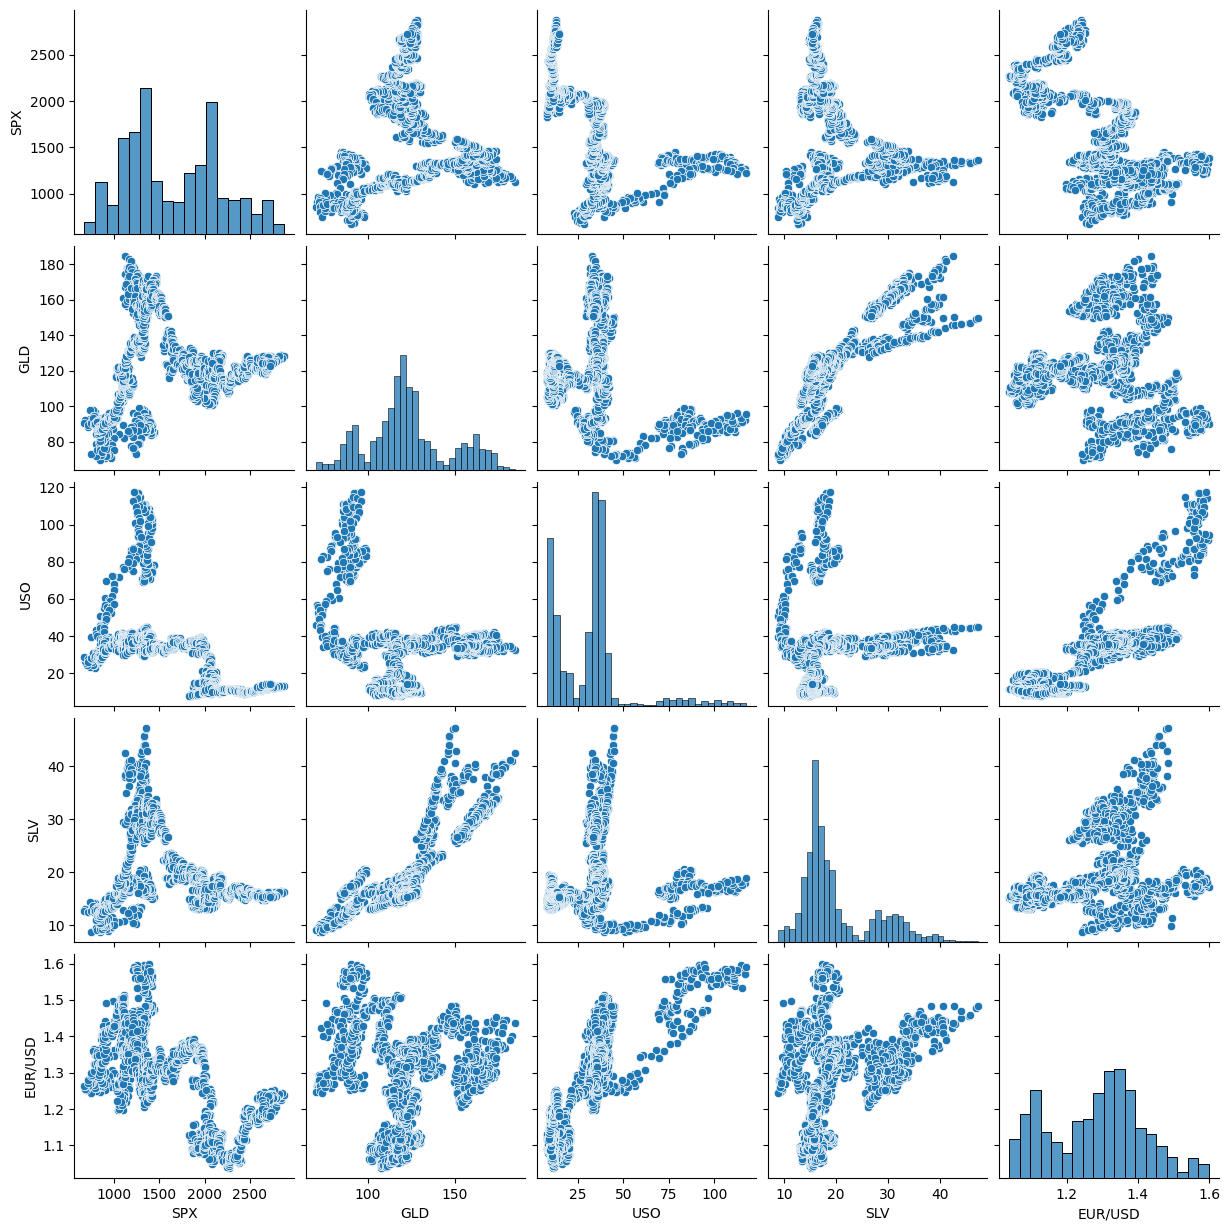

In [11]:
sns.pairplot(df)

```
From the above distribution plots we can see that the data is not normally distributed, meaning that there are some outliers in the data.
```

<Axes: >

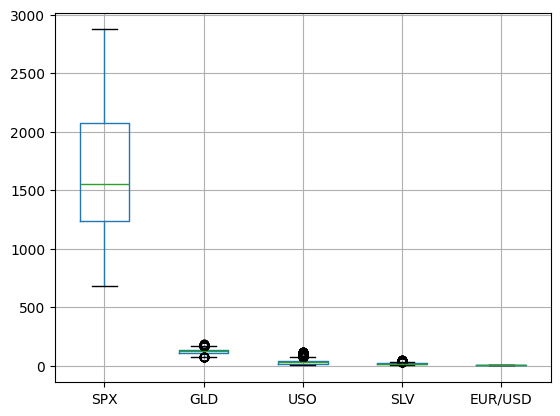

In [12]:
# Treating Outliers
df.boxplot()

In [13]:
df['GLD'] = np.log(df['GLD'])
df['USO'] = np.log(df['USO'])
df['SLV'] = np.log(df['SLV'])

<Axes: >

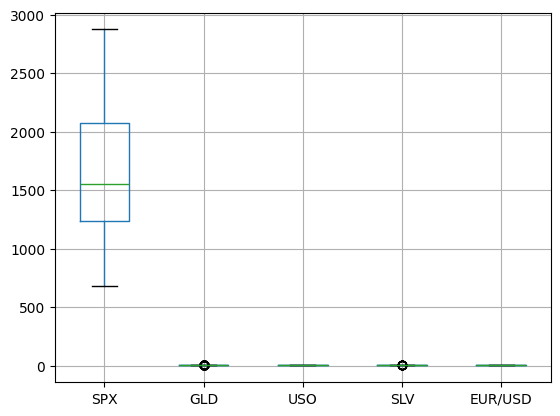

In [14]:
df.boxplot()

In [15]:
# correlation 
correlation = df.corr()

<Axes: >

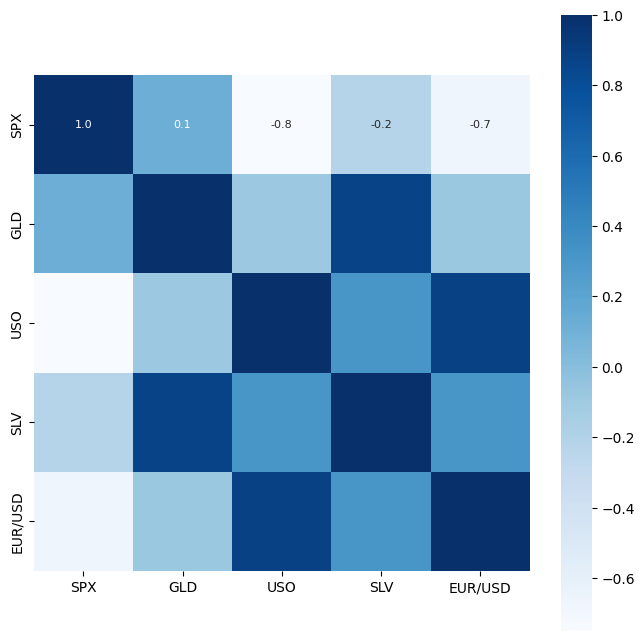

In [16]:
# Plotting a heatmap
plt.figure(figsize=(8,8))
sns.heatmap(correlation , cbar=True, fmt='.1f', cmap='Blues', annot=True, annot_kws={'size':8}, square=True)

 <h1 style="border:3px solid darkred; padding: 15px;color:white;margin:10;font-size:200%;text-align:center;display:fill;border-radius:10px;overflow:hidden; color:darkred;font-weight:bold; font-size:45px;">Train Test Splitting</h1>

In [17]:
X = df.drop(columns=['GLD'],axis=1)
y = df['GLD']

In [18]:
X.head()

,SPX,USO,SLV,EUR/USD
0,1447.160034,4.362716,2.719979,1.471692
1,1447.160034,4.361441,2.726872,1.474491
2,1411.630005,4.347823,2.719122,1.475492
3,1416.180054,4.324133,2.711577,1.468299
4,1390.189941,4.331522,2.746630,1.557099


In [19]:
y.head(3)

0    4.441003
1    4.449335
2    4.444179
Name: GLD, dtype: float64

In [20]:
X_train,X_test,y_train,y_test = train_test_split(X,y , test_size=0.2 , random_state=42)

 <h1 style="border:3px solid darkred; padding: 15px;color:white;margin:10;font-size:200%;text-align:center;display:fill;border-radius:10px;overflow:hidden; color:darkred;font-weight:bold; font-size:45px;">Feature Scaling</h1>

In [21]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train,y_train)
X_test_scaled  =scaler.transform(X_test)

 <h1 style="border:3px solid darkred; padding: 15px;color:white;margin:10;font-size:200%;text-align:center;display:fill;border-radius:10px;overflow:hidden; color:darkred;font-weight:bold; font-size:45px;">Model Training</h1>

In [22]:
# Random forest
rf = RandomForestRegressor()
rf.fit(X_train_scaled,y_train)
y_rf = rf.predict(X_test_scaled)

 <h1 style="border:3px solid darkred; padding: 15px;color:white;margin:10;font-size:200%;text-align:center;display:fill;border-radius:10px;overflow:hidden; color:darkred;font-weight:bold; font-size:45px;">Regression score using R2score and MAE</h1>

In [23]:
rf_score = metrics.r2_score(y_test,y_rf)
print("Random forest : ", rf_score)

Random forest :  0.9917870614611409


In [24]:
# checking the mean absolute error
from sklearn.metrics import mean_absolute_error
print("MAE for Random Forest")
mean_absolute_error(y_test,y_rf)

MAE for Random Forest


0.010002628001184942

 <h1 style="border:3px solid darkred; padding: 15px;color:white;margin:10;font-size:200%;text-align:center;display:fill;border-radius:10px;overflow:hidden; color:darkred;font-weight:bold; font-size:45px;">Hyperparameter Tuning using GridSearchCV</h1>

In [25]:
rf1 = RandomForestRegressor()
#Number of trees in random forest
n_estimators = [20,60,100,120]

#No. of features to consider at every split
max_features = [0.2,0.6,1.0]

#Maximum number of levels in tree
max_depth = [2,8,None]

#No. of samples
max_samples = [0.5,0.75,1.0]

In [26]:
param_grid = { 'n_estimators' : n_estimators,
               'max_features' : max_features,
               'max_depth' : max_depth,
               'max_samples' : max_samples
}

In [27]:
rf1_grid = GridSearchCV(estimator = rf1,
                       param_grid = param_grid,
                       cv=5,
                       verbose =2,
                       n_jobs = -1)

In [28]:
rf1_grid.fit(X_train_scaled,y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
[CV] END max_depth=2, max_features=0.2, max_samples=0.5, n_estimators=20; total time=   0.2s
[CV] END max_depth=2, max_features=0.2, max_samples=0.5, n_estimators=20; total time=   0.3s
[CV] END max_depth=2, max_features=0.2, max_samples=0.5, n_estimators=60; total time=   0.6s
[CV] END max_depth=2, max_features=0.2, max_samples=0.5, n_estimators=60; total time=   0.5s
[CV] END max_depth=2, max_features=0.2, max_samples=0.5, n_estimators=60; total time=   0.5s
[CV] END max_depth=2, max_features=0.2, max_samples=0.5, n_estimators=60; total time=   0.5s
[CV] END max_depth=2, max_features=0.2, max_samples=0.5, n_estimators=60; total time=   0.5s
[CV] END max_depth=2, max_features=0.2, max_samples=0.5, n_estimators=100; total time=   0.8s
[CV] END max_depth=2, max_features=0.2, max_samples=0.5, n_estimators=20; total time=   0.2s
[CV] END max_depth=2, max_features=0.2, max_samples=0.5, n_estimators=100; total time=   0.9s
[CV] 

GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [2, 8, None],
                         'max_features': [0.2, 0.6, 1.0],
                         'max_samples': [0.5, 0.75, 1.0],
                         'n_estimators': [20, 60, 100, 120]},
             verbose=2)

In [29]:
rf1_grid.best_params_

{'max_depth': None,
 'max_features': 0.6,
 'max_samples': 1.0,
 'n_estimators': 100}

In [30]:
rf1_grid.best_score_

0.9909979069534753

 <h1 style="border:3px solid darkred; padding: 15px;color:white;margin:10;font-size:200%;text-align:center;display:fill;border-radius:10px;overflow:hidden; color:darkred;font-weight:bold; font-size:45px;">Compare the Actual values and Predicted Values in a plot</h1>

In [31]:
y_test = list(y_test) 

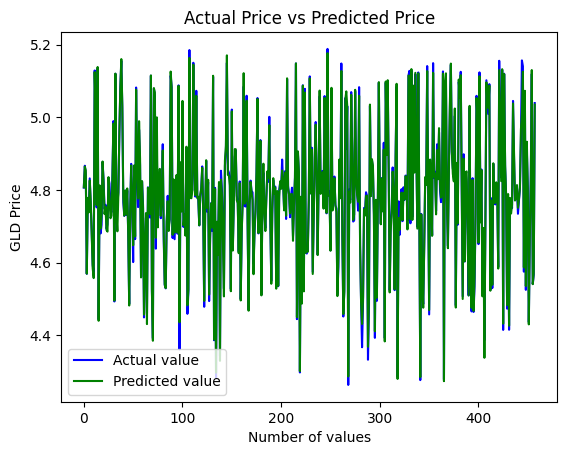

In [32]:
plt.plot(y_test , color='blue' , label='Actual value')
plt.plot(y_rf , color='green' , label='Predicted value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()

 <h1 style="border:3px solid darkred; padding: 15px;color:white;margin:10;font-size:200%;text-align:center;display:fill;border-radius:10px;overflow:hidden; color:darkred;font-weight:bold; font-size:45px;">Saving the model</h1>

In [34]:
output_file = '../../model/Random-Forest-Regressor.pkl'

In [35]:
# Using with statement
with open(output_file, 'wb') as f_out:
    pickle.dump((scaler, rf1_grid), f_out)

 <h1 style="border:3px solid darkred; padding: 15px;color:white;margin:10;font-size:200%;text-align:center;display:fill;border-radius:10px;overflow:hidden; color:darkred;font-weight:bold; font-size:45px;">Load the Model</h1>

In [1]:
import pickle

In [2]:
model_file = '../../model/Random-Forest-Regressor.pkl'

In [3]:
with open(model_file, 'rb') as f_in:
    scaler, model = pickle.load(f_in)

In [5]:
scaler, model

(MinMaxScaler(),
 GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
              param_grid={'max_depth': [2, 8, None],
                          'max_features': [0.2, 0.6, 1.0],
                          'max_samples': [0.5, 0.75, 1.0],
                          'n_estimators': [20, 60, 100, 120]},
              verbose=2))

In [10]:
test_data = {
    'SPX' : 3000.12,
    'USO' : 11.0,
    'SLV' : 15.1,
    'EUR/USD' : 1.1,
}

# Convert the dictionary values to a list
test_data_values = list(test_data.values())

X = scaler.transform([test_data_values])

/home/penscola/.local/lib/python3.10/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [12]:
prediction = model.predict(X)

In [13]:
prediction

array([4.85163428])

 <h1 style="border:3px solid darkred; padding: 15px;color:white;margin:10;font-size:200%;text-align:center;display:fill;border-radius:10px;overflow:hidden; color:darkred;font-weight:bold; font-size:45px;">Making Request</h1>

In [21]:
import requests

In [24]:
url_local = "http://127.0.0.1:9696/predict"
test_data = {
    'SPX' : 3000.12,
    'USO' : 11.0,
    'SLV' : 15.1,
    'EUR/USD' : 1.1,
}
test_data_values = list(test_data.values())
requests.post(url_local, json = test_data_values).json()

{'price': True, 'price_probability': 4.85163427815375}